# Kurze Anmerkung zu Beginn

#### Im folgenden Notebook wird eine Pixel-orientierte Bildoperation beispielhaft gezeigt.

Dabei wird mit zwei geschachtelten for-Schleifen Pixel für Pixel über des Bild iteriert.
Da Python (wie auch Matlab) eine interpretierte Sprache ist, ist dieses Vorgehen sehr (!) ineffizient. 

Da es hier aber um das Verständnis der Algorithmen geht, wählen wir trotzdem diesen ineffizienten  Weg, d.h. auf der Basis von for-Schleifen über die Bildpunkte. 

Sehr effizient ist hingegen (besonders unter Python und Matlab), wenn die durchzuführenden Anwendungen auf der Basis von Vektor- und Matrixoperationen arbeiten (z.B. mit der Python-Bibliothek "numpy"). Das ist auch mit maschienennahem Code kaum zu toppen. 

Für Projekte, die eine sehr effiziente Verarbeitung großer Bilddatenmengen erfordern (z.B. Machine-Learning-Projekte), stehen unter Python sehr leistungsfähige Bildverarbeitungsbibliotheken zur Verfügung (skimage, sklearn, opencv, usw.). Diese beinhalten umfangreiche Bildverarbeitungsmethoden. Diese Methoden sollen zu Beginn aber noch nicht verwendet werden.

In [2]:
%matplotlib inline

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np   
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   time

## PIL-Images 

PIL-Images sind gut geeignet, um Bilder in Python einzuladen.

Weitere Informationen zu PIL-Images und -methoden findet man unter :
https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

Für die Verarbeitung von Bildern auf Bildpunktebene (Pixelverarbeitung) ist es jedoch günstiger, die PIL-Images in numpy-Arrays umzuwandeln (s.u.).

In [3]:
# Bild laden mit PIL
img = Image.open("shaft.bmp")

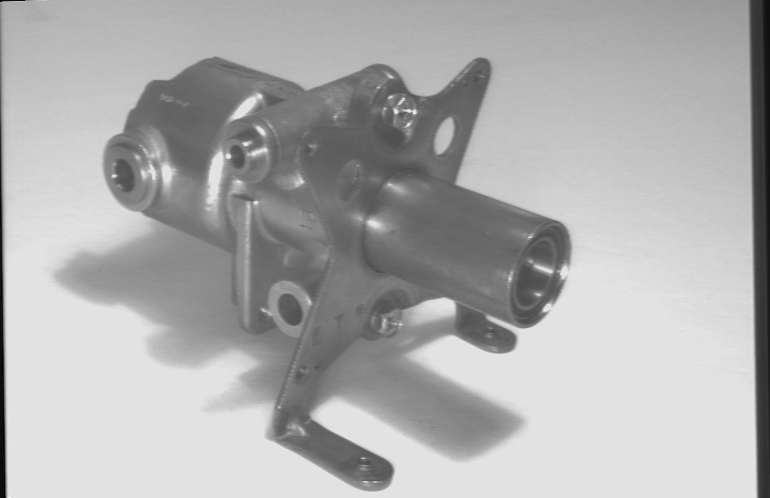

In [4]:
# PIL-Image darstellen
img

# numpy : Vektoren, Arrays, lineare Algebra und vieles mehr ...
Die Dokumentation der aktuellen Numpy-Version findet man unter:
https://numpy.org/doc/stable/

Der Zugriff auf einzelne Bildmatrix-Elemente ist unter numpy günstiger. 
Daher nun der Wechsel von PIL-Images zu numpy-Arrays.

In [5]:
print('Installierte Numpy-Version = ', np.__version__)

Installierte Numpy-Version =  1.21.5


In [6]:
# PIL-Image in ein numpy-Array umwandeln
img2 = np.array(img)
img2

array([[ 13,  13,  13, ...,  17,  16,  17],
       [ 13,  13, 110, ...,  18,  16,  18],
       [153, 154, 163, ...,  16,  16,  16],
       ...,
       [ 13,  13,  13, ...,  46,  50,  45],
       [ 13,  13,  13, ...,  46,  50,  44],
       [ 13,  13,  13, ...,  47,  51,  45]], dtype=uint8)

In [7]:
# Informationen über numpy-Array
print('shape =', img2.shape)
print('type  =', img2.dtype)
print('min   =', img2.min())
print('max   =', img2.max())

shape = (498, 770)
type  = uint8
min   = 0
max   = 255


In [8]:
# Selbstgeschriebene Funktion zum Invertieren eines Bildes
# In : int8-Bild
# Out: int8-Bild

def MyInvert(src):
    
    # Zielbilder anlegen
    dst = np.copy(src)

    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]

    for y in range(0,ysize-1):
        for x in range(0,xsize-1):
            dst[y][x] = 255 - src[y][x]
    return dst

def MyMirror(src):
    
    # Zielbilder anlegen
    dst = np.copy(src)

    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]

    for y in range(0,ysize-1):
        for x in range(0,xsize-1):
            dst[y][x] = src[y][xsize-x-1]
    return dst

In [9]:
# Invertierungsfunktion aufrufen
inv_img2 = MyInvert(img2)
mirror_img2 = MyMirror(img2)

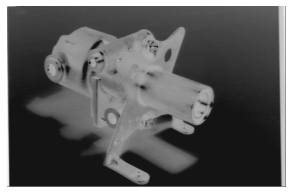

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(inv_img2, cmap='gray')
plt.axis(False)
plt.show()


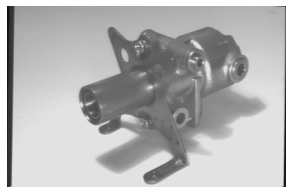

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(mirror_img2, cmap='gray')
plt.axis(False)
plt.show()


In [27]:
# Informationen zum Bild
print('img2 min/max =', img2.min(),'/', img2.max(), '  inv_img2 min/max =', inv_img2.min(),'/', inv_img2.max())
print('shape   =', img2.shape)
print('dtype   =', img2.dtype)

img2 min/max = 0 / 255   inv_img2 min/max = 9 / 255
shape   = (498, 770)
dtype   = uint8


# Vergleich der Effizienz mit numpy-Methoden:

In [28]:
# Messung der Zeit für die eigenen Methoden:
start = time.time()
inv_img2 = MyInvert(img2)
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))
start = time.time()
mirror_img2 = MyMirror(img2)
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

Runtime   = 1.810s
Runtime   = 0.317s


In [29]:
# Alternative (schnellere) Methoden:

start = time.time()
for i in range(10000):
    inv2_img2 = 255-img2
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

start = time.time()
for i in range(10000):
    inv3_img2 = ~img2
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

start = time.time()
for i in range(10000):
    inv4_img2 = np.bitwise_xor(img2,255)
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

start = time.time()
for i in range(10000):
    mirror2_img2 = np.fliplr(img2)             # Numpy-Funktion
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

start = time.time()
for i in range(10000):
    mirror3_img2 = img2[:,::-1]                # Numpy-Slicing
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

Runtime   = 3.496s
Runtime   = 4.671s
Runtime   = 4.709s
Runtime   = 0.007s
Runtime   = 0.002s


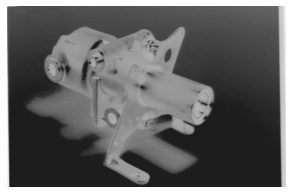

In [30]:
plt.figure(figsize = (5,5))
plt.imshow(inv2_img2, cmap='gray')
plt.axis(False)
plt.show()

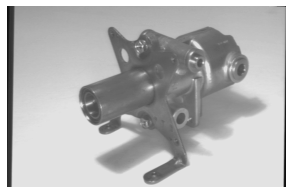

In [31]:
plt.figure(figsize = (5,5))
plt.imshow(mirror2_img2, cmap='gray')
plt.axis(False)
plt.show()